In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 10.2MB/s]


In [2]:
table = html_soup.find('table', class_='table')

# Collecting Data from website

In [49]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import pandas
import pandas as pd

In [4]:
# Using Pandas method to read the html table
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [10]:
# Collected data stored into a df
mars_temp_df = df[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [79]:
# Changing data types for dates 
mars_temp_df["terrestrial_date"] = pd.to_datetime(mars_temp_df["terrestrial_date"])
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

# Analysis

### Question: How many months exist on Mars?

In [140]:
number_Of_Months = mars_temp_df['month'].max()
print(f'According to the script above, there are {number_Of_Months} months that exists on Mars. ')

According to the script above, there are 12 months that exists on Mars. 


### Question: How many Martian days (sol) worth of data exist in the scraped dataset?

In [141]:
number_Of_Data = len(mars_temp_df['sol'].unique())
print(f'According to the script above, there are {number_Of_Data} days worth of Martian data collected.')

According to the script above, there are 1867 days worth of Martian data collected.


### Question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

In [142]:
# Group by month column, return on min_temp column of their averages of each month
avg_temp_month_df = mars_temp_df.groupby(['month'], as_index=False)['min_temp'].mean()
avg_temp_month_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [143]:
# Coldest month
coldest_month = avg_temp_month_df.loc[avg_temp_month_df['min_temp'] == avg_temp_month_df['min_temp'].min()]
coldest_month.set_index('month', inplace=True)
print(coldest_month)
print("Thus, coldest month of Mars is the 3rd month.")

        min_temp
month           
3     -83.307292
Thus, coldest month of Mars is the 3rd month.


In [144]:
# Warmest month
warmest_month = avg_temp_month_df.loc[avg_temp_month_df['min_temp'] == avg_temp_month_df['min_temp'].max()]
warmest_month.set_index('month', inplace=True)
print(warmest_month)
print("Thus, warmest month of Mars is the 8th month.")

        min_temp
month           
8     -68.382979
Thus, warmest month of Mars is the 8th month.


<AxesSubplot:title={'center':'Average Temperature of Martian Months'}, xlabel='Martian Months', ylabel='Average Temperature'>

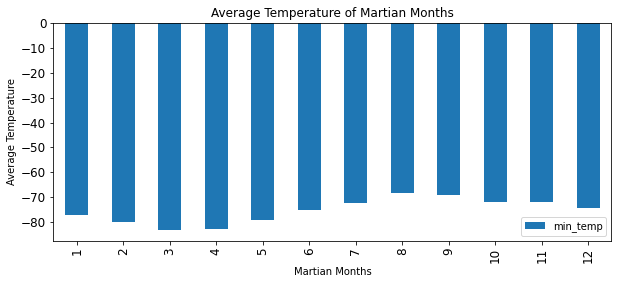

In [145]:
# Plot of the result
avg_temp_month_df.plot.bar(x='month', y='min_temp', 
                           title = 'Average Temperature of Martian Months',
                           xlabel = 'Martian Months',
                           ylabel = 'Average Temperature',
                           fontsize = 'large',
                           figsize = (10,4))

### Question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [146]:
# Group by month column, return on pressure column of their averages of each month
avg_mars_atmospheric_pressure_df = mars_temp_df.groupby(['month'],as_index = False)['pressure'].mean()
avg_mars_atmospheric_pressure_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [147]:
# Highest atmospheric pressure
highest_pressure = avg_mars_atmospheric_pressure_df.loc[avg_mars_atmospheric_pressure_df['pressure'] == avg_mars_atmospheric_pressure_df['pressure'].max()]
highest_pressure.set_index('month', inplace=True)
print(highest_pressure)
print("Thus, the month with the highest atmospheric pressure in Mars is the 9th month.")

        pressure
month           
9      913.30597
Thus, the month with the highest atmospheric pressure in Mars is the 9th month.


In [148]:
# Highest atmospheric pressure
lowest_pressure = avg_mars_atmospheric_pressure_df.loc[avg_mars_atmospheric_pressure_df['pressure'] == avg_mars_atmospheric_pressure_df['pressure'].min()]
lowest_pressure.set_index('month', inplace=True)
print(lowest_pressure)
print("Thus, the month with the lowest atmospheric pressure in Mars is the 6th month.")

         pressure
month            
6      745.054422
Thus, the month with the lowest atmospheric pressure in Mars is the 6th month.


<AxesSubplot:title={'center':'Average Atmospheric Pressure of Martian Months'}, xlabel='Martian Months', ylabel='Average Atmospheric Pressure'>

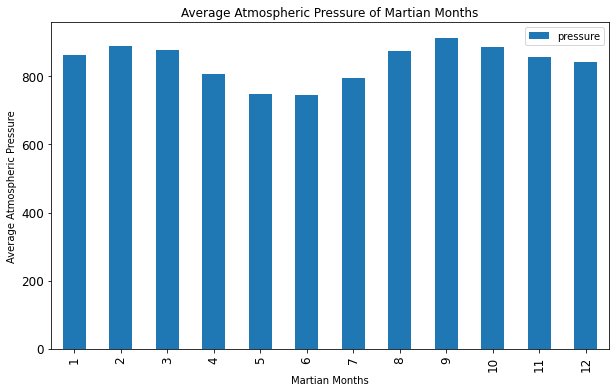

In [86]:
# Plot of the result
avg_mars_atmospheric_pressure_df.plot.bar(x='month', y='pressure', 
                           title = 'Average Atmospheric Pressure of Martian Months',
                           xlabel = 'Martian Months',
                           ylabel = 'Average Atmospheric Pressure',
                           fontsize = 'large',
                           figsize = (10,6))

### Question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

<AxesSubplot:>

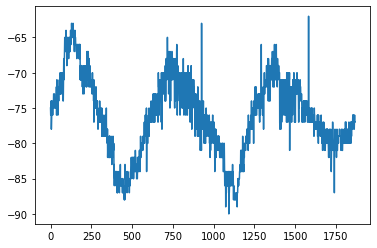

In [87]:
# Plot of the daily min temperature 
mars_temp_df['min_temp'].plot()

<AxesSubplot:>

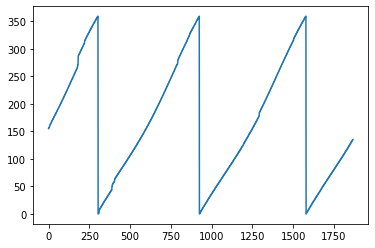

In [88]:
# Plot of the solar longitude
mars_temp_df['ls'].plot()

In [155]:
# dataframe where solar longitude is 0
mars_temp_df[mars_temp_df['ls'] == 0]

# mars_temp_df[mars_temp_df['ls'] == 0]['sol']

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [152]:
print(f"From the dataframe above, we see that the solar longitude (ls) is 0 approximately every {1019-351} or {1688-1019} sol. Thus, from the gathered data, we can say approximately ~669 Earth days for every Martian year.")

From the dataframe above, we see that the solar longitude (ls) is 0 approximately every 668 or 669 sol. Thus, from the gathered data, we can say approximately ~669 Earth days for every Martian year.


In [153]:
# Create the output file (CSV).
output_data_file = "mars_data.csv"
# Export the mars_temp_df into a CSV.
mars_temp_df.to_csv(output_data_file)

In [69]:
# Quit the browser if opened
browser.quit()